# Decomposition
## In this notebook we are going to explain step-by-step our optimal decomposition

# 1) Trotterization

Using the Trotter's formula:
\begin{equation}
    e^{(A+B)t} = (e^{A\frac{t}{N}} e^{B\frac{t}{N}})^N + o(t^2)
    \tag{1}
\end{equation}

we split the hamiltonian into two pieces (instead of 6):
$
    H=H_1+H_2
$
$
    H_2=\sigma_x^{(0)}\otimes \sigma_x^{(1)} \otimes I^{(2)}  +  \sigma_y^{(0)} \otimes \sigma_y^{(1)} \otimes I^{(2)} + \sigma_z^{(0)} \otimes \sigma_z^{(1)} \otimes I^{(2)}
$

$
    H_1=I^{(0)} \otimes \sigma_x^{(1)} \otimes \sigma_x^{(2)}  + I^{(0)}  \otimes  \sigma_y^{(1)} \otimes \sigma_y^{(2)} + I^{(0)}  \otimes \sigma_z^{(0)} \otimes \sigma_z^{(1)}
$

so, using eq. 1.
$
    e^{-iHt}=e^{-i(H_1 + H_2)t} \simeq [e^{-iH_1\frac{t}{N}}e^{-iH_2\frac{t}{N}}]^N
$

Now, let us study the two exponentials here.
We can easily write the matrix representation for $H_1$.

In [97]:
import numpy as np
from sympy import *
from sympy.physics.quantum import TensorProduct as Tp
import warnings
warnings.filterwarnings('ignore')

X = Matrix([[0,1],[1,0]])  #defining the pauli matrices
Y = Matrix([[0,-I],[I,0]])
Z = Matrix([[1,0],[0,-1]])
Id = eye(2)

H1 = Tp(X,X,Id) + Tp(Y,Y,Id) + Tp(Z,Z,Id) 
H1

Matrix([
[1, 0,  0,  0,  0,  0, 0, 0],
[0, 1,  0,  0,  0,  0, 0, 0],
[0, 0, -1,  0,  2,  0, 0, 0],
[0, 0,  0, -1,  0,  2, 0, 0],
[0, 0,  2,  0, -1,  0, 0, 0],
[0, 0,  0,  2,  0, -1, 0, 0],
[0, 0,  0,  0,  0,  0, 1, 0],
[0, 0,  0,  0,  0,  0, 0, 1]])

and we can see that it can be write as a new matrix $H_1^{'}$ minus the identity ($H_1 = H_1^{'} - I$): 

In [59]:
H1p = (H1 + eye(8))
H1p

Matrix([
[2, 0, 0, 0, 0, 0, 0, 0],
[0, 2, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 2, 0, 0, 0],
[0, 0, 0, 0, 0, 2, 0, 0],
[0, 0, 2, 0, 0, 0, 0, 0],
[0, 0, 0, 2, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 2, 0],
[0, 0, 0, 0, 0, 0, 0, 2]])

Now we can compute the exponential of it.
$
    e^{-iH_1\frac{t}{N}}=e^{-i(H_1^{'}-I)\frac{t}{N}}=e^{-iH_1^{'}\frac{t}{N}}e^{iI\frac{t}{N}}
$
The Identity brings a global phase to every q-bit, and using the definition of the exponential and the property: $H_1^{'} \cdot H_1^{'} = Id$, we can get the final matrix for $ e^{-iH_1^{'}\frac{t}{N}} $. And just visualizing it one can see that it is the tensor product of a 4x4 matrix (m) and a 2x2 identity. It means that it is an operator on the first two qubit as we expected.

In [60]:
a = symbols("a")

m = Matrix([
    [exp(-I*a),0,0,0],
    [0,cos(a),-I*sin(a),0],
    [0,-I*sin(a),cos(a),0],
    [0,0,0,exp(-I*a)]
])
m

Matrix([
[exp(-I*a),         0,         0,         0],
[        0,    cos(a), -I*sin(a),         0],
[        0, -I*sin(a),    cos(a),         0],
[        0,         0,         0, exp(-I*a)]])

In [61]:
exp_H1p = Tp(m, Id)
exp_H1p

Matrix([
[exp(-I*a),         0,         0,         0,         0,         0,         0,         0],
[        0, exp(-I*a),         0,         0,         0,         0,         0,         0],
[        0,         0,    cos(a),         0, -I*sin(a),         0,         0,         0],
[        0,         0,         0,    cos(a),         0, -I*sin(a),         0,         0],
[        0,         0, -I*sin(a),         0,    cos(a),         0,         0,         0],
[        0,         0,         0, -I*sin(a),         0,    cos(a),         0,         0],
[        0,         0,         0,         0,         0,         0, exp(-I*a),         0],
[        0,         0,         0,         0,         0,         0,         0, exp(-I*a)]])

where $a=2t/N$

following the same reasoning for $H_2$ one can easily find it. Than again we define $H_2 = H_2^{'} - I$, and we exponentiate it.

In [62]:
exp_H2p = Tp(Id,m)
exp_H2p

Matrix([
[exp(-I*a),         0,         0,         0,         0,         0,         0,         0],
[        0,    cos(a), -I*sin(a),         0,         0,         0,         0,         0],
[        0, -I*sin(a),    cos(a),         0,         0,         0,         0,         0],
[        0,         0,         0, exp(-I*a),         0,         0,         0,         0],
[        0,         0,         0,         0, exp(-I*a),         0,         0,         0],
[        0,         0,         0,         0,         0,    cos(a), -I*sin(a),         0],
[        0,         0,         0,         0,         0, -I*sin(a),    cos(a),         0],
[        0,         0,         0,         0,         0,         0,         0, exp(-I*a)]])

## So, the final form of a trotter step is the following:

$
    e^{-iHt}=e^{-i(H_1 + H_2)t} \simeq [e^{-iH_1\frac{t}{N}}e^{-iH_2\frac{t}{N}}]^N
$

$
    T_{step}=e^{-iH_1\frac{t}{N}}e^{-iH_2\frac{t}{N}}=
    e^{-i(H_1^{'}-I)\frac{t}{N}}e^{-i(H_2^{'}-I)\frac{t}{N}}=
    e^{-iH_1^{'}\frac{t}{N}}e^{iI\frac{t}{N}}e^{-iH_2^{'}\frac{t}{N}} e^{iI\frac{t}{N}}=
$
$
   =(e^{i\frac{2t}{N}}\cdot I)e^{-iH_1^{'}\frac{t}{N}}e^{-iH_2^{'}\frac{t}{N}}
$

In [63]:
Trotter_Step =  exp_H1p * exp_H2p * exp(I*a)
Trotter_Step

Matrix([
[exp(-I*a),                         0,                         0,         0,         0,                         0,                         0,         0],
[        0,                    cos(a),                 -I*sin(a),         0,         0,                         0,                         0,         0],
[        0, -I*exp(I*a)*sin(a)*cos(a),        exp(I*a)*cos(a)**2,         0, -I*sin(a),                         0,                         0,         0],
[        0,                         0,                         0,    cos(a),         0, -I*exp(I*a)*sin(a)*cos(a),       -exp(I*a)*sin(a)**2,         0],
[        0,       -exp(I*a)*sin(a)**2, -I*exp(I*a)*sin(a)*cos(a),         0,    cos(a),                         0,                         0,         0],
[        0,                         0,                         0, -I*sin(a),         0,        exp(I*a)*cos(a)**2, -I*exp(I*a)*sin(a)*cos(a),         0],
[        0,                         0,                         0,  

# 2) Single Column Decomposition

If the initial state is not a superposition of states is possible to consider only the column of the matrix associated with this state. Our initial state is $|110>$ so we are in this situation. Actually we can generalize this solution to every initial state that is not a superposition of state with different magnetization.

Cause of the magnetization has to preserve during the evolution we can define the general 2-qubit operator that does that:

In [64]:
a1, r1, f1 = symbols("a1 r1 f1")

H = Matrix([ 
    [1/sqrt(2),1/sqrt(2)],
    [1/sqrt(2),-1/sqrt(2)]
])

cx_01= Matrix([
    [1,0,0,0],
    [0,0,0,1],
    [0,0,1,0],
    [0,1,0,0]
])

def ry(alpha):   # generic ry gate
    return Matrix([ 
        [cos(alpha/2),-sin(alpha/2)],
        [sin(alpha/2),cos(alpha/2)]
    ])

def rz(alpha):   # generic rz gate
    return Matrix([ 
        [exp(-1j*(alpha/2)),0],
        [0,exp(1j*(alpha/2))]
    ])

M1 = Matrix(simplify(Tp(rz(2*f1),Id)*Tp(Id,H)*cx_01*Tp(ry(a1),ry(a1))*cx_01*Tp(Id,H)*Tp(rz(2*r1),Id)))
M1

Matrix([
[exp(1.0*I*(-f1 - r1)),                             0,                              0,                    0],
[                    0, exp(-1.0*I*(f1 + r1))*cos(a1), -exp(-1.0*I*(f1 - r1))*sin(a1),                    0],
[                    0,  exp(1.0*I*(f1 - r1))*sin(a1),   exp(1.0*I*(f1 + r1))*cos(a1),                    0],
[                    0,                             0,                              0, exp(1.0*I*(f1 + r1))]])

Now we have to simulate interction between 3 qubit, so we have to apply this basic operation two times at least.
Here we compute the operator obtained applying the M1 operator on the qubits 0 and 1 and than M2 on qubits 1 and 2.

M1 and M2 operators have the same form but they are defined with different parameters.

In [136]:
a2, r2, f2 = symbols("a2 r2 f2")
M2 = Matrix(simplify(Tp(rz(2*f2),Id)*Tp(Id,H)*cx_01*Tp(ry(a2),ry(a2))*cx_01*Tp(Id,H)*Tp(rz(2*r2),Id)))

Ubest = Tp(M2, Id) * Tp(Id, M1)
Ubest

Matrix([
[exp(1.0*I*(-f1 - r1))*exp(1.0*I*(-f2 - r2)),                                                          0,                                                          0,                                                  0,                                                    0,                                                            0,                                                           0,                                         0],
[                                          0,        exp(-1.0*I*(f1 + r1))*exp(1.0*I*(-f2 - r2))*cos(a1),       -exp(-1.0*I*(f1 - r1))*exp(1.0*I*(-f2 - r2))*sin(a1),                                                  0,                                                    0,                                                            0,                                                           0,                                         0],
[                                          0, exp(1.0*I*(f1 - r1))*exp(-1.0*I*(f2 + r2))*sin(a1)*cos(a2), exp(1.0

Perfect, now we have a matrix with 6 parameters and we can write 6 equations to impose the equality between the elements of the $7^{th}$ column (which is the column applied to the initial state $|110>$) of the latter matrix, $U_{best}$,and the numerical evaluation of the $7^{th}$ row of $(T_{step})^n$ matrix, $U$.

So, the $(T_{step})^n$ matrix is easly computing here:

In [163]:
steps = 42
time = np.pi/3
U = eye(8)

for _ in range(steps):
    U=U*Trotter_Step
    U=U.subs(a,2*time/steps)
    U=U.evalf(40)

U.evalf(4)

Matrix([
[-0.5 - 0.866*I,                    0,                    0,                   0,                   0,                    0,                    0,              0],
[             0,    0.2497 - 0.4328*I,  0.01075 - 0.01895*I,                   0,  -0.7604 - 0.4143*I,                    0,                    0,              0],
[             0, -0.01084 + 0.01846*I,   -0.4999 - 0.8655*I,                   0, 0.01075 - 0.01895*I,                    0,                    0,              0],
[             0,                    0,                    0,   0.2497 - 0.4328*I,                   0, -0.01084 + 0.01846*I,   -0.7388 - 0.4517*I,              0],
[             0,   -0.7388 - 0.4517*I, -0.01084 + 0.01846*I,                   0,   0.2497 - 0.4328*I,                    0,                    0,              0],
[             0,                    0,                    0, 0.01075 - 0.01895*I,                   0,   -0.4999 - 0.8655*I, -0.01084 + 0.01846*I,              0],
[      

We impose the following equation in order to have the same values on the $7^{th}$ column of both the matrices:
$$
\begin{cases}
b_0=im(U_{4,7}) \\
b_1=im(U_{6,7}) \\
b_2 = im(U_{7,7}) \\
\alpha_0=re(U_{4,7}) \\
\alpha_1=re(U_{6,7}) \\
\alpha_2=re(U_{7,7}) \\
\end{cases}
$$
$$
\begin{cases}
-f_1+r_1-f_2+r_2 = atan(\frac{b_0}{\alpha_0}) =x_0 \\
-\pi-f_1+r_1+f_2+r_2=atan(\frac{b_1}{\alpha_1}) = x_1 \\
f_1+r_1+f_2+r_2=atan(\frac{b_2}{\alpha_2}) = x_2 \\
sin(a_1)sin(a_2)=|U_{4, 7}|=\sqrt{\alpha_0^2+b_0^2} \\
sin(a_1)cos(a_2)=|U_{6, 7}|=\sqrt{\alpha_1^2+b_1^2} \\
cos(a_1)=|U_{7, 7}|=\sqrt{\alpha_2^2+b_2^2} \\
\end{cases}
$$
solving them one can find:
$$
\begin{cases}
r_1 = \frac{x_0+x_2}{2} \\
r_2 = 0 \\
f_2 = \frac{x_2-x_1-\pi}{2} \\
f_1 = -\frac{x_2-x_0}{2} + f_2 \\
a_1=acos(\sqrt{\alpha_2^2+b_2^2}) \\
a_2=acos(\frac{\sqrt{\alpha_1^2+b_1^2}}{sin(a_1)}) \\
\end{cases}
$$


## 3) Decomposition of $M_1$ and $M_2$ operators

One can easly see that the M matrix has a kind of $ry$ sigle qubit rotation in the 2x2 block in the middle. 
Using the property of c-not to be a row or column moves if composed to another operator is possible to find the matrix (without the phases) we are looking for wit only 2 c-not. Using also 2 $rz$ rotations to fix the phasis is possible to get the final decomposition of $M_1$ and $M_2$.

In [164]:
def angolo(x):
    alpha=re(x)
    beta=im(x)
    if alpha>0:
        return atan(beta/alpha)  
    if alpha<0:
        if beta>=0:
            return atan(beta/alpha)+np.pi
        else:
            return atan(beta/alpha)-np.pi
    if alpha==0:
        if beta>0:
            return np.pi/2
        else:
            return -np.pi/2
    return 0

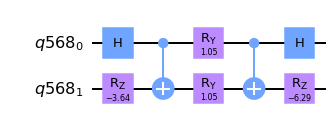

In [165]:
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute

r1=float(angolo(U[3*8+6])+angolo(U[6*8+6]))/2
r2=0
f1=float(angolo(U[6*8+6])-angolo(U[5*8+6])-np.pi)/2
f2=float((angolo(U[6*8+6])-angolo(U[3*8+6]))/2-f1)
a1=float(acos(abs(U[6*8+6])))
a2=float(acos(abs(U[5*8+6])/sin(a1)))

qr1=QuantumRegister(2)
M1_qc=QuantumCircuit(qr1, name="M1")

M1_qc.rz(2*r1,qr1[1])
M1_qc.h(qr1[0])
M1_qc.cx(qr1[0],qr1[1])
M1_qc.ry(a1,qr1)
M1_qc.cx(qr1[0],qr1[1])
M1_qc.h(qr1[0])
M1_qc.rz(2*f1,qr1[1])

M1_qc.draw(output="mpl")

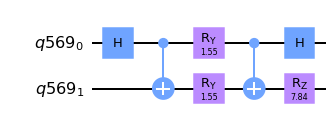

In [166]:
qr2=QuantumRegister(2)
M2_qc=QuantumCircuit(qr2, name="M2")

#M2_qc.rz(2*r2,qr2[1])
M2_qc.h(qr2[0])
M2_qc.cx(qr2[0],qr2[1])
M2_qc.ry(a2,qr2)
M2_qc.cx(qr2[0],qr2[1])
M2_qc.h(qr2[0])
M2_qc.rz(2*f2,qr2[1])

M2_qc.draw(output="mpl")

## Buiding the final evolution cirquit

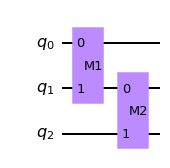

In [167]:
qr = QuantumRegister(3 ,name="q")
qc = QuantumCircuit(qr, name="U")

qc.append(M1_qc, [qr[0],qr[1]])
qc.append(M2_qc, [qr[1],qr[2]])

qc.draw(output="mpl")

In [168]:
def matrix_from_cirquit(qc, phase=0):
    backend = Aer.get_backend('unitary_simulator')
    job = execute(qc, backend, shots=32000)
    result = job.result()
    A=result.get_unitary(qc, decimals=10)*np.exp(1j*phase)
    return Matrix(A)

You can see that the $7^{th}$ columns are equivalent

In [169]:
matrix_from_cirquit(qc)

Matrix([
[0.4997210707 + 0.8661863838*I,                             0,                             0,                             0,                              0,                              0,                             0,                             0],
[                            0, 0.2496726584 + 0.4327675374*I, 0.7390537474 + 0.4518576996*I,                             0,                              0,                              0,                             0,                             0],
[                            0,   0.0108447094 + 0.01846178*I, -0.0105863643 - 0.006359069*I,                             0, -0.4995683941 - 0.8659217434*I,                              0,                             0,                             0],
[                            0,                             0,                             0, -0.021188661 - 0.0127277082*I,                              0, -0.2495963775 - 0.4326353167*I, -0.738827949 - 0.4517196464*I,                

In [170]:
U.evalf(10)

Matrix([
[-0.5 - 0.8660254038*I,                                0,                                0,                               0,                               0,                                0,                                0,                     0],
[                    0,    0.2496726584 - 0.4327675374*I,  0.01075401052 - 0.01894830032*I,                               0,  -0.7604266689 - 0.4143095661*I,                                0,                                0,                     0],
[                    0, -0.01084470943 + 0.01846178001*I,   -0.4999093011 - 0.8655388835*I,                               0, 0.01075401052 - 0.01894830032*I,                                0,                                0,                     0],
[                    0,                                0,                                0,   0.2496726584 - 0.4327675374*I,                               0, -0.01084470943 + 0.01846178001*I,    -0.738827949 - 0.4517196464*I,                